# Machine Learning with Python

## Introduction

In [ ]:
# connect ke google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

## Data Acquisition

In [ ]:
# !unzip -q '/content/drive/MyDrive/Kuliah/Math Creativity/Datasets/car-price-prediction.zip' -d '/content/datasets/'

In [ ]:
df_car = pd.read_csv('train.csv')
df_car.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration

In [ ]:
# cek tipe data

df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [ ]:
# cek missing value

df_car[df_car.isnull().values.any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,Stone,92.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,746,746,GasA,Ex,Y,SBrkr,760,896,0,1656,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,397,TA,TA,Y,178,128,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1931,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,No,LwQ,425,Unf,0,459,884,GasA,TA,Y,FuseA,959,408,0,1367,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1978.0,Unf,1,560,TA,TA,Y,0,0,0,0,120,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1994,1994,Hip,CompShg,HdBoard,HdBoard,BrkFace,554.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1314,Unf,0,672,1986,GasA,Ex,Y,SBrkr,1987,0,0,1987,1,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,1994.0,Fin,2,691,TA,TA,Y,262,36,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,8,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Fa,TA,No,Unf,0,Unf,0,864,864,GasA,

In [ ]:
# cek duplicated rows

df_car.duplicated().any()

False

In [ ]:
# misahin kolom numerik sama kategorik

kolom_numerik = [kolom for kolom in df_car.columns if df_car[kolom].dtypes != 'O']
kolom_kategorik = [kolom for kolom in df_car.columns if df_car[kolom].dtypes == 'O']

print(kolom_numerik)
print(kolom_kategorik)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [ ]:
print('Jumlah Kolom Numerik:', len(kolom_numerik))
print('Jumlah Kolom Kategorik:', len(kolom_kategorik))

Jumlah Kolom Numerik: 38
Jumlah Kolom Kategorik: 43


#### Data Numerik

In [ ]:
# cek info statistik

df_car.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1188.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,45.725973,565.019063,1054.079428,1158.503574,342.880858,6.246227,1507.630659,0.420969,0.060365,1.559174,0.382049,2.857029,1.045274,6.493249,0.607625,1978.430135,1.760127,471.674345,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,159.593598,440.826822,422.824587,375.890904,435.516797,50.860979,513.865812,0.519023,0.244839,0.552737,0.500583,0.816301,0.219153,1.609958,0.641792,24.718827,0.743578,212.502409,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,224.500000,796.000000,882.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,0.000000,470.000000,996.000000,1086.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,0.000000,807.000000,1297.500000,1389.500000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


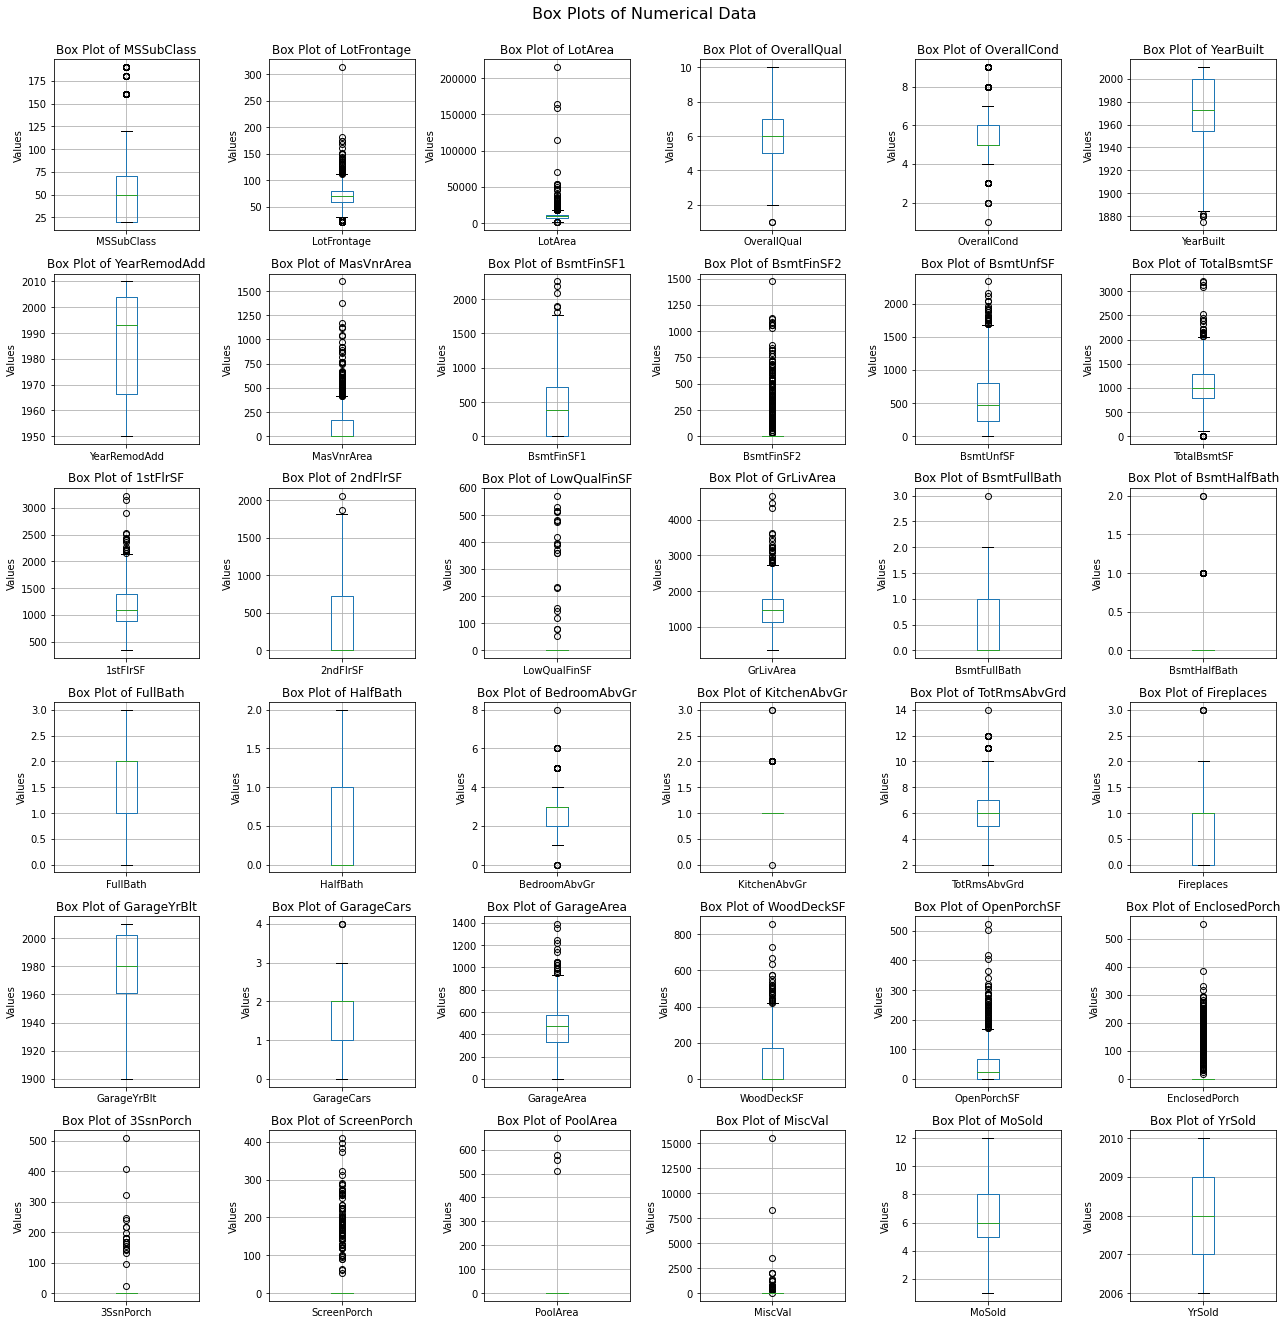

In [ ]:
# cek outlier kolom numerik

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(kolom_numerik))))
lebar = int(np.ceil(np.sqrt(len(kolom_numerik))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(kolom_numerik):
  baris = index // tinggi
  kolom = index % tinggi

  # cara 1
  # df_car.boxplot(column=fitur, ax=axs[baris][kolom])
  # axs[baris][kolom].set_ylabel("Values")
  # axs[baris][kolom].set_title(f"Box Plot of {fitur}")

  # cara 2
  plt.subplot(lebar, tinggi, index+1)
  df_car.boxplot(column=fitur)
  plt.ylabel("Values")
  plt.title(f"Box Plot of {fitur}")

plt.suptitle("Box Plots of Numerical Data", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

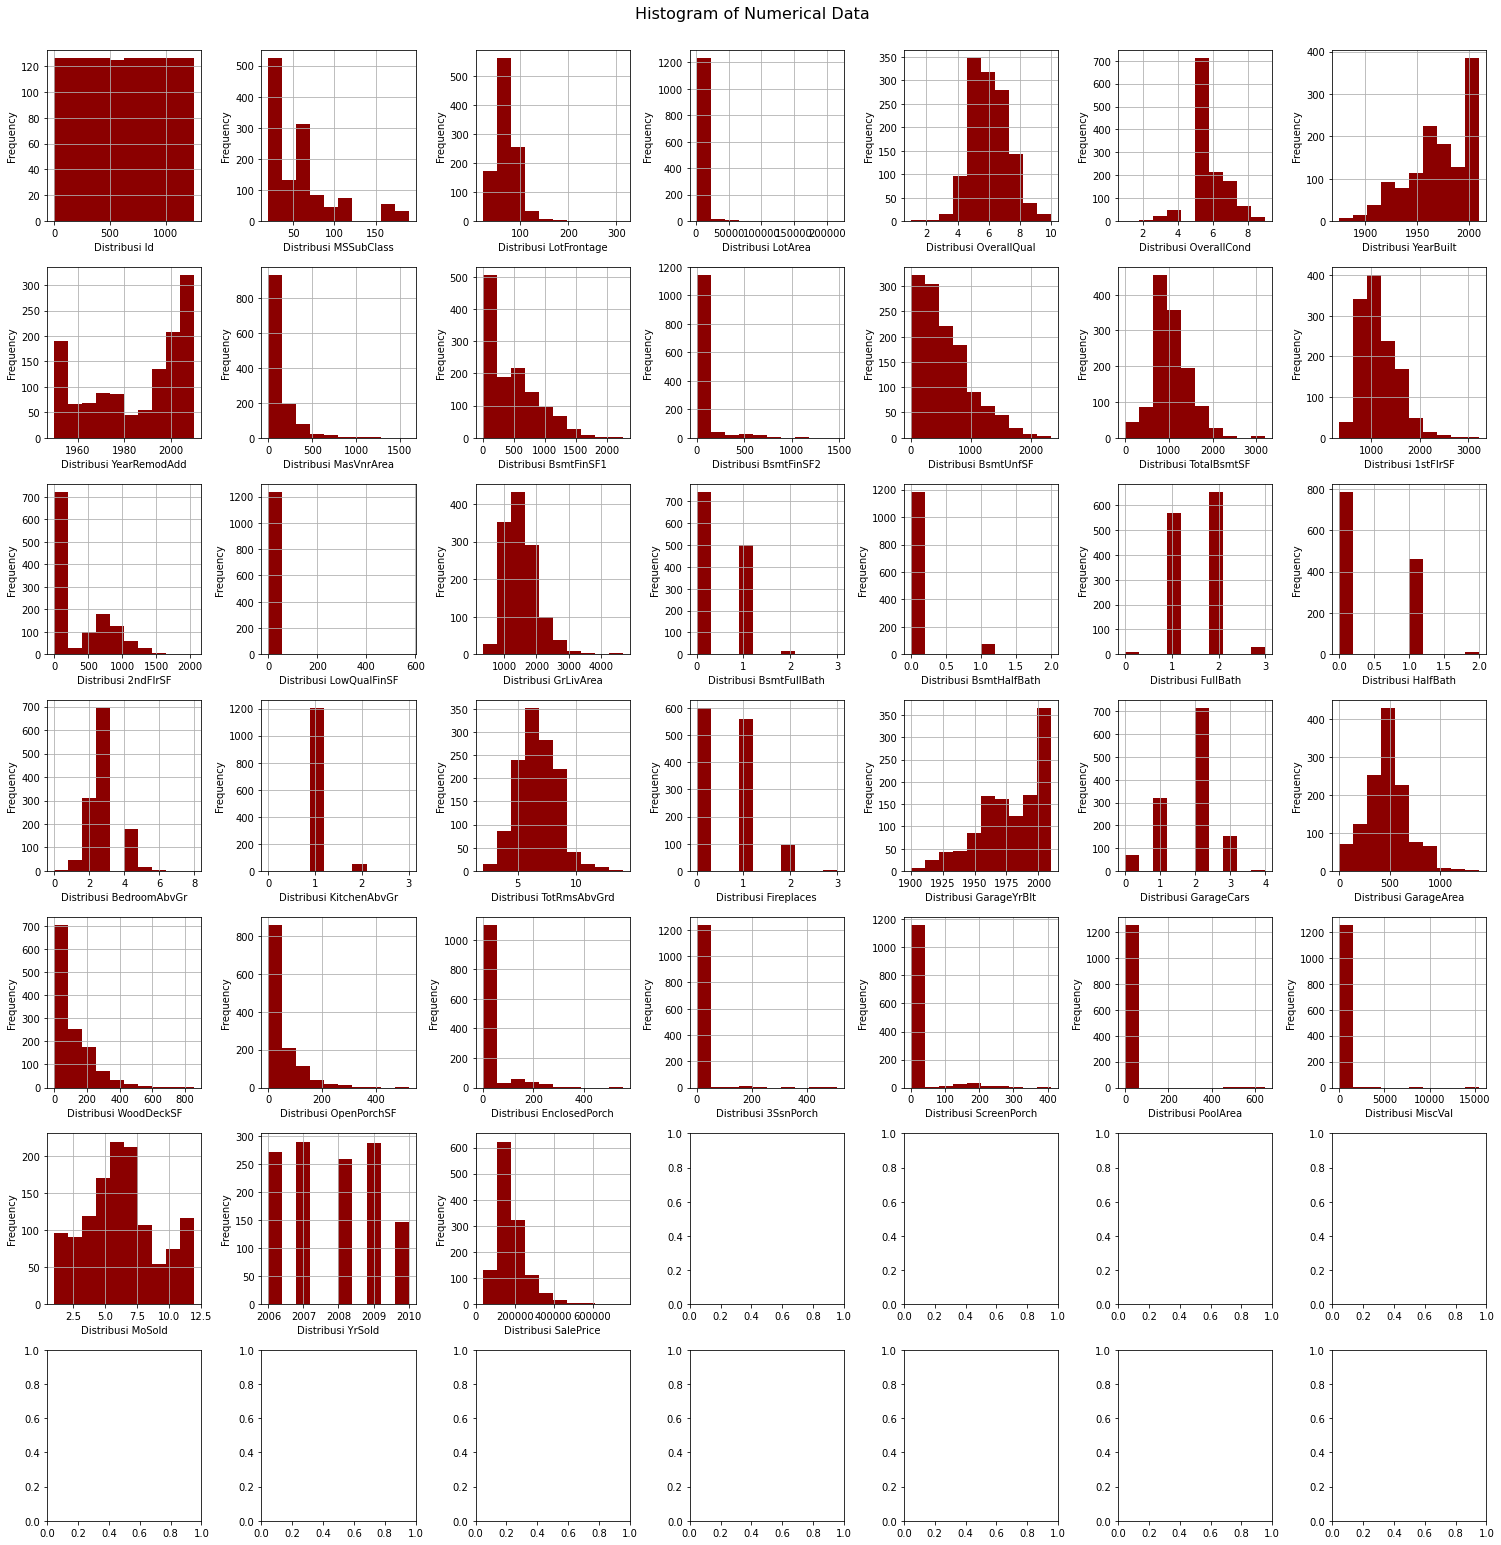

In [ ]:
# cek distribusi data numerik

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(kolom_numerik))))
lebar = int(np.ceil(np.sqrt(len(kolom_numerik))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(kolom_numerik):
  baris = index // tinggi
  kolom = index % tinggi
  
  plt.subplot(lebar, tinggi, index+1)
  df_car[fitur].hist(color='darkred')
  plt.xlabel(f'Distribusi {fitur}')
  plt.ylabel("Frequency")

plt.suptitle("Histogram of Numerical Data", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Data Kategorik

In [ ]:
# cek nilai unik data kategorik

for fitur in kolom_kategorik:
  print(f'Jumlah Nilai {fitur}:', len(df_car[fitur].unique()))
  print(df_car[fitur].unique())

Jumlah Nilai MSZoning: 5
['RL' 'RM' 'C (all)' 'FV' 'RH']
Jumlah Nilai Street: 2
['Pave' 'Grvl']
Jumlah Nilai Alley: 3
[nan 'Grvl' 'Pave']
Jumlah Nilai LotShape: 4
['Reg' 'IR1' 'IR2' 'IR3']
Jumlah Nilai LandContour: 4
['Lvl' 'Bnk' 'Low' 'HLS']
Jumlah Nilai Utilities: 2
['AllPub' 'NoSeWa']
Jumlah Nilai LotConfig: 5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Jumlah Nilai LandSlope: 3
['Gtl' 'Mod' 'Sev']
Jumlah Nilai Neighborhood: 25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Jumlah Nilai Condition1: 9
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Jumlah Nilai Condition2: 8
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Jumlah Nilai BldgType: 5
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Jumlah Nilai HouseStyle: 8
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoy

In [ ]:
carbrand = []
for carname in df_car['Id'].unique():
  brand = carname.split(' ')[0]
  if brand not in carbrand:
    carbrand.append(brand)

print("Jumlah Brand")
print(len(carbrand))
print("List Merk Mobil")
print(carbrand)

AttributeError: ignored

In [ ]:
# Handling CarName
## Opsi 1
## bikin kolom baru CarBrand terus hapus CarName karena unique value-nya terlalu banyak
# df_car['CarBrand'] = df_car['CarName'].apply(lambda x: x.split(' ')[0])
# df_car.drop(['CarName'], axis=1, inplace=True)
# df_car.head()

## Opsi 2
## Drop CarName
df_car.drop(['Id'], axis=1, inplace=True)
df_car.head()

## Opsi 3
## Biarin

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# cek nilai unik data kategorik (lagi)

# update kolom kategorik
kolom_kategorik = [kolom for kolom in df_car.columns if df_car[kolom].dtypes == 'O']

for fitur in kolom_kategorik:
  print(f'Jumlah Nilai {fitur}:', len(df_car[fitur].unique()))
  print(df_car[fitur].unique())

Jumlah Nilai MSZoning: 5
['RL' 'RM' 'C (all)' 'FV' 'RH']
Jumlah Nilai Street: 2
['Pave' 'Grvl']
Jumlah Nilai Alley: 3
[nan 'Grvl' 'Pave']
Jumlah Nilai LotShape: 4
['Reg' 'IR1' 'IR2' 'IR3']
Jumlah Nilai LandContour: 4
['Lvl' 'Bnk' 'Low' 'HLS']
Jumlah Nilai Utilities: 2
['AllPub' 'NoSeWa']
Jumlah Nilai LotConfig: 5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Jumlah Nilai LandSlope: 3
['Gtl' 'Mod' 'Sev']
Jumlah Nilai Neighborhood: 25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Jumlah Nilai Condition1: 9
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Jumlah Nilai Condition2: 8
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Jumlah Nilai BldgType: 5
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Jumlah Nilai HouseStyle: 8
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoy

<ipython-input-30-8c32fa196e1c>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


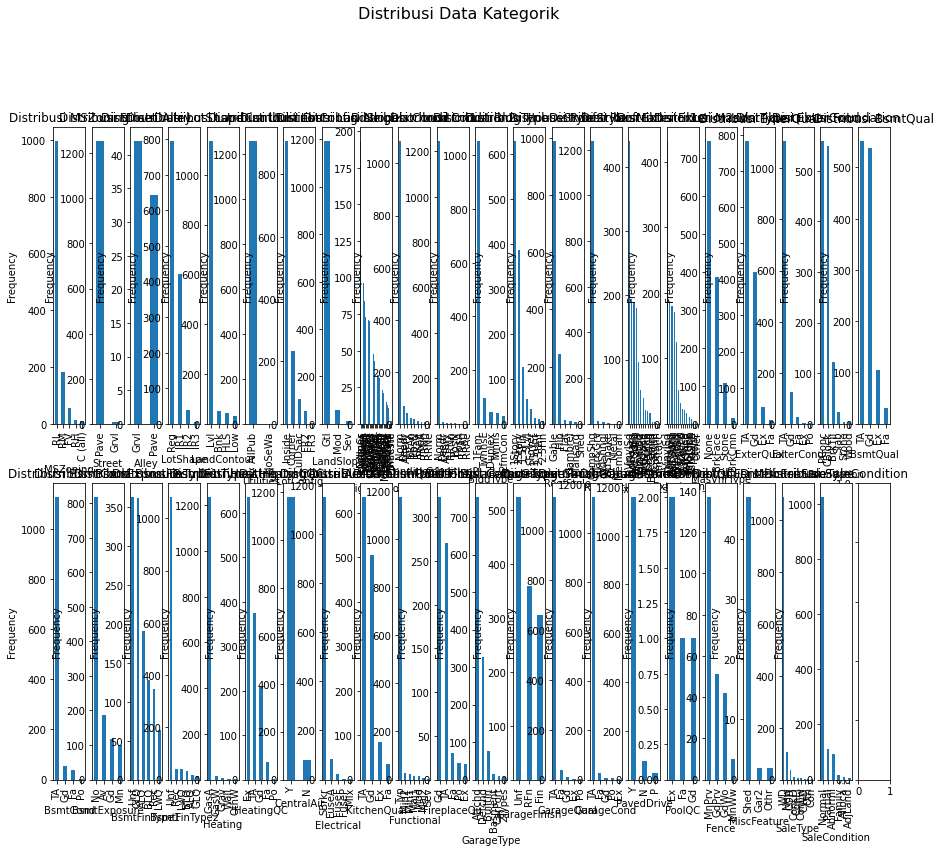

In [ ]:
# distribusi data kategorik

fig, axs = plt.subplots(2, int(np.ceil(len(kolom_kategorik)//2))+1, figsize=(15, 12))

for index, fitur in enumerate(kolom_kategorik):
  if fitur == 'CarName':
    continue

  if fitur != 'CarBrand':
    plt.subplot(2, int(np.ceil(len(kolom_kategorik)//2))+1, index+1)
  else:
    plt.subplot(2, 2, 4)

  df_car[fitur].value_counts().plot.bar()
  plt.xlabel(fitur)
  plt.ylabel("Frequency")
  plt.title(f"Distribusi {fitur}")


plt.suptitle("Distribusi Data Kategorik", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Cek Korelasi

In [ ]:
# cek korelasi antara masing-masing kolom (baik antar masing-masing fitur maupun dengan target)

df_car.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.397117,-0.124523,0.038126,-0.058921,0.030828,0.044212,0.026365,-0.068183,-0.048566,-0.141998,-0.237170,-0.255475,0.306504,0.045522,0.077398,0.023702,-0.006169,0.133017,0.181627,-0.021278,0.272842,0.042974,-0.033466,0.075443,-0.043084,-0.104279,0.004691,-0.003911,-0.023596,-0.036815,-0.032764,0.000203,-0.009542,0.001958,-0.010881,-0.076628
LotFrontage,-0.397117,1.000000,0.390300,0.245102,-0.058688,0.112571,0.082321,0.170871,0.158104,0.062602,0.144712,0.335394,0.429573,0.079917,0.046662,0.383150,0.077108,-0.003161,0.213000,0.041029,0.289597,-0.011720,0.354284,0.252134,0.062952,0.316819,0.339431,0.076873,0.142270,0.028764,0.070290,0.052953,0.128189,0.004415,0.019926,0.006987,0.378138
LotArea,-0.124523,0.390300,1.000000,0.097107,-0.004448,0.006597,0.011644,0.089085,0.190906,0.120436,-0.009771,0.233493,0.271434,0.050284,0.006925,0.241856,0.155761,0.049930,0.129285,0.007830,0.112878,-0.016560,0.177305,0.263860,-0.032483,0.153345,0.163802,0.173781,0.070516,-0.016449,0.013383,0.051514,0.023248,0.038711,0.006419,-0.020139,0.267146
OverallQual,0.038126,0.245102,0.097107,1.000000,-0.083344,0.569794,0.556333,0.410741,0.223098,-0.053877,0.312696,0.537320,0.464553,0.309279,-0.038920,0.598090,0.094544,-0.044297,0.555215,0.285470,0.113908,-0.188754,0.436375,0.384657,0.547631,0.611510,0.558520,0.233774,0.304890,-0.094715,0.018474,0.075551,0.053473,-0.038977,0.078894,-0.021286,0.790786
OverallCond,-0.058921,-0.058688,-0.004448,-0.083344,1.000000,-0.381242,0.081891,-0.126939,-0.042889,0.046174,-0.139201,-0.172232,-0.165285,0.033167,0.023304,-0.090488,-0.044130,0.129516,-0.198464,-0.060019,0.003178,-0.082645,-0.066667,-0.036815,-0.314817,-0.188862,-0.154747,-0.004177,-0.023493,0.072373,0.024191,0.045916,-0.013045,0.063002,-0.010689,0.030414,-0.083382
YearBuilt,0.030828,0.112571,0.006597,0.569794,-0.381242,1.000000,0.594038,0.316002,0.235523,-0.042714,0.157881,0.393029,0.288842,0.033306,-0.187373,0.220969,0.165702,-0.050255,0.485409,0.257610,-0.050910,-0.165798,0.122161,0.146816,0.841953,0.546753,0.490776,0.233036,0.187761,-0.378061,0.026625,-0.034936,-0.007349,-0.032466,0.019304,0.014410,0.524407
YearRemodAdd,0.044212,0.082321,0.011644,0.556333,0.081891,0.594038,1.000000,0.184918,0.121526,-0.061302,0.183812,0.294682,0.235863,0.161456,-0.073219,0.302125,0.102382,-0.009142,0.440783,0.200966,-0.028907,-0.136440,0.207268,0.107915,0.653402,0.429668,0.372573,0.215284,0.243421,-0.196151,0.036746,-0.023735,0.016141,-0.010992,0.031268,0.053221,0.512674
MasVnrArea,0.026365,0.170871,0.089085,0.410741,-0.126939,0.316002,0.184918,1.000000,0.253137,-0.063762,0.101299,0.344520,0.330541,0.176142,-0.069774,0.382704,0.077655,0.016012,0.275623,0.199677,0.104774,-0.050228,0.280989,0.247317,0.256497,0.362282,0.359539,0.165032,0.116177,-0.103496,0.011902,0.086028,-0.023270,-0.030357,-0.003837,0.001436,0.483754
BsmtFinSF1,-0.068183,0.158104,0.190906,0.223098,-0.042889,0.235523,0.121526,0.253137,1.000000,-0.046444,-0.514475,0.484407,0.420630,-0.141313,-0.065537,0.181435,0.662639,0.061495,0.056184,0.005119,-0.098893,-0.063617,0.050293,0.249514,0.144944,0.248202,0.295341,0.208447,0.082063,-0.097119,0.017842,0.072006,0.078790,0.002993,-0.011076,0.007577,0.409673
BsmtFinSF2,-0.048566,0.062602,0.120436,-0.053877,0.046174,-0.042714,-0.061302,-0.063762,-0.046444,1.000000,-0.199820,0.120895,0.106610,-0.097414,0.020279,-0.002569,0.148759,0.089955,-0.067675,-0.042121,-0.025806,-0.035328,-0.043176,0.058902,-0.074037,-0.020757,-0.000974,0.065673,0.005176,0.031000,-0.033233,0.084689,0.035974,-0.000479,-0.013717,0.015374,0.000474


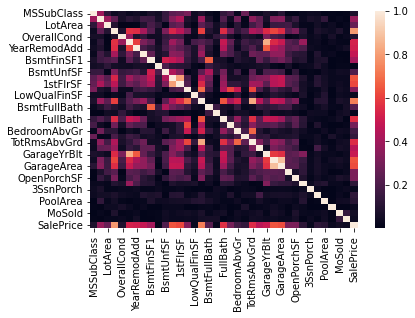

In [ ]:
# plot korelasi dengan nilai absolute
# karena korelasi ditandai dengan nilai jauh dari 0
# jika nilai mendekati -1 maka ada korelasi negatif
# jika nilai mendekati 1 maka ada korelasi positif

sns.heatmap(df_car.corr(method='pearson').abs(), fmt=".4f")
plt.show()

In [ ]:
# Dapat dilihat kolom: symboling, carheight, stroke, compressionratio, dan peakrpm
# tidak memiliki korelasi yang kuat dengan price

## Data Cleaning

#### Missing Value

In [ ]:
# Opsi 1: Drop

# hapus baris dengan missing value
df_car.dropna(axis=0, inplace=True)

# hapus kolom dengan missing value
df_car.dropna(axis=1, inplace=True)

In [ ]:
df_car

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
# Opsi 2: Imputasi

# ganti missing value data numerik dengan mean

for kolom in kolom_numerik:
  kolom_mean = df_car[kolom].mean()
  df_car[kolom].fillna(kolom_mean, inplace=True)

# ganti missing value data kategorik dengan mode
for kolom in kolom_kategorik:
  modus_kolom = df_car[kolom].mode()[0]
  df_car[kolom].fillna(modus_kolom, inplace=True)

KeyError: ignored

#### Row Duplicates

In [ ]:
# remove duplicates
df_car.drop_duplicates(inplace=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Outlier

In [ ]:
# change outlier value data numerik

## ganti outlier (nilai terlalu besar) dengan nilai 75% percentile
for fitur in kolom_numerik:
  new_value = df_car[fitur].describe()['75%']
  # cara 1
  df_car[fitur].loc[df_car[fitur] > new_value] = new_value
  # cara 2
  # df_car[fitur] = df_car[fitur].apply(lambda x: new_value if x > new_value else x)

## ganti outlier (nilai terlalu kecil) dengan nilai 25% percentile
for fitur in kolom_numerik:
  new_value = df_car[fitur].describe()['25%']
  # cara 1
  df_car[fitur].loc[df_car[fitur] < new_value] = new_value
  # cara 2
  # df_car[fitur] = df_car[fitur].apply(lambda x: new_value if x < new_value else x)

df_car.head()

KeyError: ignored

In [ ]:
# change outlier value - kategorik

## ganti kategori yang frekuensinya di bawah 25% distribusi frekuensi dengan nilai mode
for fitur in kolom_numerik:
  kategori_terbanyak = df_car[fitur].mode()[0]
  frekuensi_kategori = df_car[fitur].value_counts()
  batas_frekuensi = df_car[fitur].value_counts().describe()['25%']
  # cara 1
  # df_car[fitur].loc[df_car[fitur] < kategori_terbanyak] = kategori_terbanyak
  # cara 2
  # df_car[fitur] = df_car[fitur].apply(
  #     lambda x: kategori_terbanyak if frekuensi_kategori[x] < batas_frekuensi else x
  # )

df_car.head()

## Data Preprocessing

In [ ]:
from sklearn import preprocessing

### Categorical Data

In [ ]:
df = df_car.copy()
y_true = df['SalePrice']
df = df.drop(['SalePrice'], axis=1)

kolom_numerik = [kolom for kolom in df.columns if df[kolom].dtypes != 'O']
kolom_kategorik = [kolom for kolom in df.columns if df[kolom].dtypes == 'O']

In [ ]:
df['cylindernumber'].unique()

In [ ]:
# ordinal encoding

cylindernumber_map = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six': 4,
    'eight': 5,
    'twelve': 6,
}

df['cylindernumber'] = df['cylindernumber'].map(cylindernumber_map)

In [ ]:
# one-hot encoding
# df = pd.get_dummies(df, drop_first=False)

# dummy variable encoding
df = pd.get_dummies(df, drop_first=True)

### Numerical Data

In [ ]:
# scaling

# pilih 1 opsi metode scaling, tinggal dikomen yang gak dipake
# scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(
    df_scaled, 
    columns = df.columns,
    index = df.index
)

ValueError: ignored

In [ ]:
df_scaled.head()

## Feature Selection

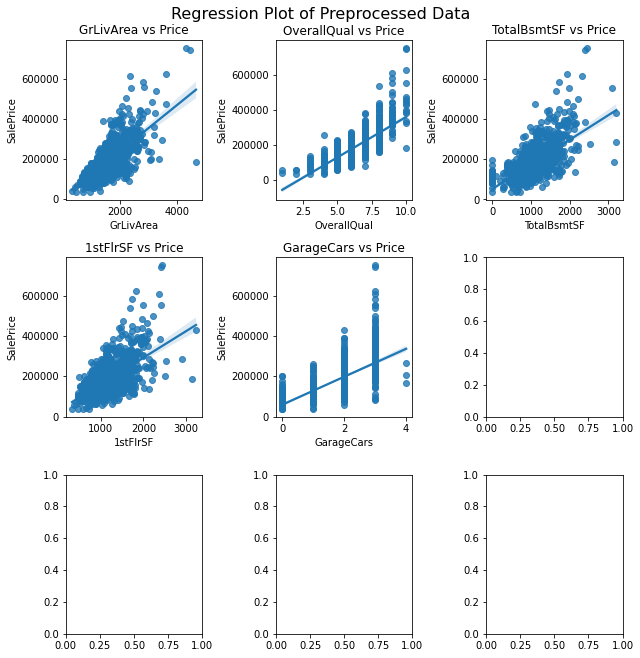

In [ ]:
# cek korelasi regresi numerik

# ukuran per plot
tinggi = int(np.ceil(np.sqrt(len(df.columns))))
lebar = int(np.ceil(np.sqrt(len(df.columns))))

fig, axs = plt.subplots(lebar, tinggi, figsize=(lebar*3, tinggi*3))

for index, fitur in enumerate(df.columns):
  baris = index // tinggi
  kolom = index % tinggi
  
  # cara 1
  plt.subplot(lebar, tinggi, index+1)
  sns.regplot(x = df[fitur], y = y_true)
  plt.xlabel(fitur)
  plt.title(f"{fitur} vs Price")

  # cara 2
  # sns.regplot(x = df[fitur], y = y_true, ax = axs[baris][kolom])
  # axs[baris][kolom].set_ylabel("Values")
  # axs[baris][kolom].set_title(f"Box Plot of {fitur}")
  

plt.suptitle("Regression Plot of Preprocessed Data", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df = df_car[["GrLivArea", "OverallQual", "TotalBsmtSF", "1stFlrSF", "GarageCars"]]
df.head(5)

,GrLivArea,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars
0,1710,7,856,856,2
1,1262,6,1262,1262,2
2,1786,7,920,920,2
3,1717,7,756,961,3
4,2198,8,1145,1145,3


In [ ]:
df.dropna()

,GrLivArea,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars
0,1710,7,856,856,2
1,1262,6,1262,1262,2
2,1786,7,920,920,2
3,1717,7,756,961,3
4,2198,8,1145,1145,3
...,...,...,...,...,...
1254,1656,7,746,760,2
1255,1367,6,884,959,1
1256,1987,8,1986,1987,2
1257,864,5,864,864,0


In [ ]:
df_temp_before_fitting = pd.concat([df, y_true], axis=1)

plt.figure(figsize=(25, 25))
sns.heatmap(df_temp_before_fitting.corr(method='pearson').abs(), fmt=".4f")
plt.show()

## Data Splitting

#### CATATAN: SPLIT DILAKUKAN SEBELUM DILAKUKAN PREPROCESSING DATA
#### Selama proses pengolahan data, anggap data test set belum pernah ada. Ini dilakukan agar proses analisis/praproses kita terpaku sama data yang sudah dimiliki (training set) dan data test adalah data yang diasumsikan akan dijumpai di masa mendatang saat model sudah digunakan dalam produksi.

Topik Diskusi: 

https://www.kaggle.com/questions-and-answers/326155

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# use non-scaled data
# X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.2)

# use scaled data
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.2)

X_train.describe()

,GrLivArea,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1508.397219,6.090367,1043.818272,1150.380338,1.753724
std,516.055337,1.371673,414.081025,372.803304,0.735985
min,334.000000,1.000000,0.000000,334.000000,0.000000
25%,1131.500000,5.000000,784.000000,873.000000,1.000000
50%,1456.000000,6.000000,990.000000,1086.000000,2.000000
75%,1768.000000,7.000000,1270.000000,1373.500000,2.000000
max,4676.000000,10.000000,3200.000000,3228.000000,4.000000


In [ ]:
X_test.describe()

,GrLivArea,OverallQual,TotalBsmtSF,1stFlrSF,GarageCars
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1504.567460,6.154762,1095.083333,1190.964286,1.785714
std,506.023911,1.421189,454.654719,387.039219,0.774156
min,630.000000,2.000000,0.000000,483.000000,0.000000
25%,1112.500000,5.000000,848.000000,901.750000,1.000000
50%,1456.000000,6.000000,1033.000000,1094.000000,2.000000
75%,1753.000000,7.000000,1361.250000,1429.500000,2.000000
max,4476.000000,10.000000,3206.000000,2411.000000,4.000000


## Modeling & Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm

# import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
regression_model = DecisionTreeRegressor()
regr = regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
skor_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Rooted Mean Squared Error:", rmse)
print("R2 Score (Coefficient of Determination)", skor_r2)

print("Predictions")
print(y_pred.tolist())
print("Actual Value")
print(y_test.tolist())

Mean Absolute Error: 28263.368386243386
Mean Squared Error: 1707668516.0761685
Rooted Mean Squared Error: 41323.94603708809
R2 Score (Coefficient of Determination) 0.7799615425104919
Predictions
[148000.0, 87000.0, 178850.0, 240000.0, 88000.0, 214000.0, 146800.0, 501837.0, 52000.0, 52000.0, 250000.0, 125000.0, 181000.0, 173733.0, 228000.0, 204750.0, 130000.0, 310000.0, 128500.0, 55993.0, 139000.0, 165500.0, 218750.0, 130000.0, 127500.0, 320000.0, 121500.0, 83000.0, 180000.0, 200624.0, 143500.0, 116500.0, 212000.0, 143000.0, 119900.0, 110000.0, 423000.0, 129500.0, 220000.0, 137000.0, 256000.0, 108000.0, 158000.0, 124312.5, 129900.0, 255500.0, 135750.0, 146000.0, 145000.0, 260000.0, 108627.66666666667, 140000.0, 125000.0, 193500.0, 86000.0, 206000.0, 173000.0, 315500.0, 91500.0, 116500.0, 140700.0, 91500.0, 223500.0, 212000.0, 255500.0, 556581.0, 135000.0, 234000.0, 173500.0, 126000.0, 279500.0, 140000.0, 280000.0, 212000.0, 237000.0, 370878.0, 141000.0, 348000.0, 284000.0, 135000.0, 451

In [ ]:
regression_model = RandomForestRegressor()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
skor_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Rooted Mean Squared Error:", rmse)
print("R2 Score (Coefficient of Determination)", skor_r2)

print("Predictions")
print(y_pred.tolist())
print("Actual Value")
print(y_test.tolist())

#### CarName -> CarBrand

In [ ]:
# regression_model = DecisionTreeRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 1917.7073170731708
Mean Squared Error: 6641359.853658536
Rooted Mean Squared Error: 2577.0835946198054
R2 Score (Coefficient of Determination) 0.906702050766938


In [ ]:
# regression_model = RandomForestRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 1753.637357886179
Mean Squared Error: 6024238.050350607
Rooted Mean Squared Error: 2454.432327514981
R2 Score (Coefficient of Determination) 0.9153713895686777


#### CarName Di-DROP

In [ ]:
# regression_model = DecisionTreeRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 1694.7317073170732
Mean Squared Error: 6981615.719512195
Rooted Mean Squared Error: 2642.274724458491
R2 Score (Coefficient of Determination) 0.8914994050717079


In [ ]:
# regression_model = RandomForestRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 1364.825500487805
Mean Squared Error: 4025513.801320141
Rooted Mean Squared Error: 2006.3683114822516
R2 Score (Coefficient of Determination) 0.9374398907240625


#### CarName TIDAK dihandle

In [ ]:
# regression_model = DecisionTreeRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 2066.1138292682926
Mean Squared Error: 7814241.556387536
Rooted Mean Squared Error: 2795.3964935921945
R2 Score (Coefficient of Determination) 0.8827749930419488


In [ ]:
# regression_model = RandomForestRegressor()
# regression_model.fit(X_train, y_train)

# y_pred = regression_model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# skor_r2 = r2_score(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("Rooted Mean Squared Error:", rmse)
# print("R2 Score (Coefficient of Determination)", skor_r2)

Mean Absolute Error: 1527.80456097561
Mean Squared Error: 3500882.9367611953
Rooted Mean Squared Error: 1871.0646532819744
R2 Score (Coefficient of Determination) 0.9474816559406599


# Studi Kasus

## Studi Kasus 1 - Regression Problem

### Prediksi Harga Rumah (81 kolom)
https://www.kaggle.com/competitions/neolen-house-price-prediction
- Prediksikan harga suatu rumah berdasarkan data yang telah diberikan.

## Studi Kasus 2 - Classification Problem

### Klasifikasi Harga Rumah (81 kolom)
https://www.kaggle.com/competitions/neolen-house-price-prediction

- Klasifikasikan harga suatu rumah berdasarkan data yang telah diberikan dengan data yang sama pada studi kasus regresi. Namun, data harga diubah dari yang tadinya numerik menjadi kategorik menjadi: Murah, Sedang, dan Mahal.
- Syarat kategorisasi data numerik menjadi murah, sedang, atau mahal tergantung peserta.

### Contoh kode kategorisasi data

In [ ]:
df_example = pd.DataFrame({
    "ID": [1, 2, 3, 4, 5, 6],
    "Nama": ["Mahasiswa A", "Mahasiswa B", "Mahasiswa C", "Mahasiswa D", "Mahasiswa E", "Mahasiswa F"],
    "Umur": [22, 21, 20, 19, 20, 19],
    "Jurusan": ["Matematika", "Fisika", "Ilmu Komputer", "Teknik Elektro", "Farmasi", "Sistem Informasi"],
}).set_index("ID")

df_example

In [ ]:
def kategorisasi_fakultas(x):
  if x in ["Matematika", "Fisika", "Biologi", "Kimia", "Geografi", "Geofisika", "Geologi"]:
    return "MIPA"
  elif x in ["Teknik Sipil", "Teknik Lingkungan", "Teknik Elektro", "Teknik Komputer", "Teknik Perkapalan", "Teknik Mesin", "Teknik Kimia"]:
    return "Teknik"
  elif x == "Farmasi":
    return "Farmasi"
  elif x in ["Ilmu Komputer", "Sistem Informasi"]:
    return "Ilmu Komputer"
  return "Tidak Dikenal"

df_example["Fakultas"] = df_example["Jurusan"].apply(kategorisasi_fakultas)
df_example